In [1]:
import numpy as np
import seaborn as sns

In [2]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

2025-04-22 21:28:33.946392: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 21:28:33.956316: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 21:28:35.751425: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 21:28:35.883303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-22 21:28:36.279802: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
df_bld = pd.read_csv('/home/yy693/pi_hafler/ASAP/scanpy/241027_CSF_integrate/cellnumber.csv')

In [4]:
# Convert data to anndata object
data_all = dat.from_pandas(df_bld, covariate_columns=["DonorID"])

In [5]:
data_all.obs

,DonorID
0,YPD001
1,YPD002
2,YPD003
3,YPD004
4,YPD005
...,...
64,YPD092
65,YPD093
66,YPD094
67,YPD096


In [6]:
df_meta = pd.read_csv('/home/yy693/pi_hafler/ASAP/scanpy/241027_CSF_integrate/obs.csv', index_col=0)
# df_meta = df_meta.loc[df_bld.sampleid]
# df_meta = df_meta.reset_index()
# df_meta.head()

In [7]:
df_meta = df_meta[['DonorID', 'EnrollmentCategory', 'Age', 'Gender']].drop_duplicates(subset=['DonorID']).reset_index(drop=True)
df_meta['group'] = df_meta['EnrollmentCategory']
df_meta.head()

,DonorID,EnrollmentCategory,Age,Gender,group
0,YPD001,HC,79.0,Male,HC
1,YPD002,HC,59.0,Male,HC
2,YPD003,RBD,58.0,Male,RBD
3,YPD006,RBD,70.0,Male,RBD
4,YPD007,HC,66.0,Female,HC


In [8]:
data_all.obs = pd.merge(data_all.obs, df_meta, on='DonorID', how='left')

In [9]:
data_all.obs

,DonorID,EnrollmentCategory,Age,Gender,group
0,YPD001,HC,79.0,Male,HC
1,YPD002,HC,59.0,Male,HC
2,YPD003,RBD,58.0,Male,RBD
3,YPD004,RBD,68.0,Male,RBD
4,YPD005,RBD,59.0,Male,RBD
...,...,...,...,...,...
64,YPD092,RBD,66.0,Male,RBD
65,YPD093,RBD,71.0,Male,RBD
66,YPD094,RBD,74.0,Male,RBD
67,YPD096,RBD,69.0,Male,RBD


In [ ]:
data_all.obs[data_all.obs.Age.isna()]

,DonorID,EnrollmentCategory,Age,Gender,group


In [ ]:
data_all.obs['EnrollmentCategory'].unique()

array(['HC', 'RBD', 'PD-RBD', 'PD'], dtype=object)

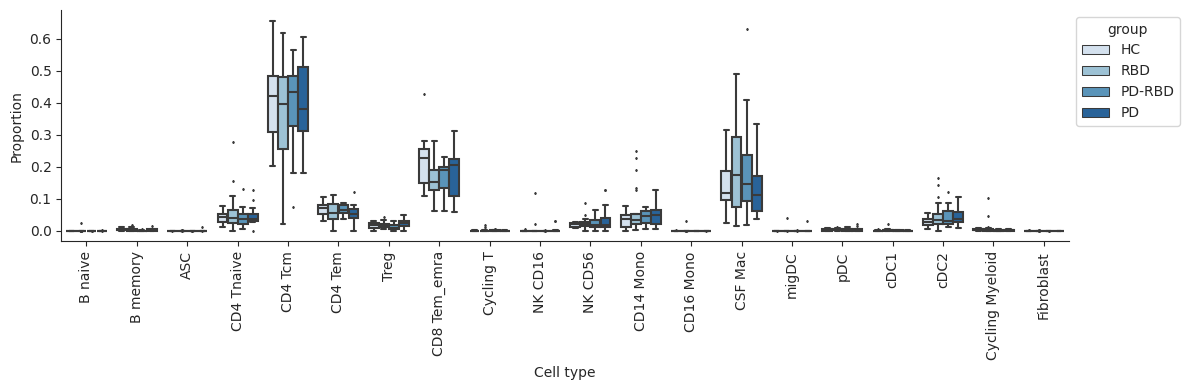

In [13]:
viz.boxplots(data_all, feature_name="group", figsize=(12,4))
sns.despine()
plt.savefig('../scanpy/250407_CSF_downstream/graph/scCODA_box.pdf', bbox_inches='tight')

In [14]:
data_all

AnnData object with n_obs × n_vars = 69 × 20
    obs: 'DonorID', 'EnrollmentCategory', 'Age', 'Gender', 'group'

In [63]:
data_all.obs.isna().sum()

DonorID               0
EnrollmentCategory    0
Age                   0
Gender                0
group                 0
dtype: int64

In [64]:
data_all.obs[data_all.obs.Gender.isna()]

,DonorID,EnrollmentCategory,Age,Gender,group


In [65]:
model = mod.CompositionalAnalysis(data_all, formula="group + Age", reference_cell_type="automatic")

Automatic reference selection! Reference cell type set to CD4 Tem


2025-04-09 11:46:23.552922: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Zero counts encountered in data! Added a pseudocount of 0.5.


In [66]:
# Run MCMC
sim_results = model.sample_hmc()

I0000 00:00:1744213590.307818   88477 service.cc:146] XLA service 0x14aef8007b80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744213590.334463   88477 service.cc:154]   StreamExecutor device (0): Host, Default Version
  0%|          | 1/20000 [00:02<11:23:14,  2.05s/it]2025-04-09 11:46:39.479670: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744213601.150112   88477 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
100%|██████████| 20000/20000 [01:43<00:00, 193.79it/s]


MCMC sampling finished. (139.538 sec)
Acceptance rate: 9.7%


In [67]:
sim_results.summary()

Compositional Analysis summary:

Data: 69 samples, 20 cell types
Reference index: 5
Formula: group + Age

Intercepts:
                 Final Parameter  Expected Sample
Cell Type                                        
B naive                   -0.027        49.696005
B memory                  -0.797        23.009900
ASC                       -1.455        11.916507
CD4 Tnaive                 0.853       119.812083
CD4 Tcm                    3.601      1870.431707
CD4 Tem                    1.264       180.715603
Treg                       0.275        67.216889
CD8 Tem_emra               2.499       621.368648
Cycling T                 -1.138        16.361394
NK CD16                   -1.488        11.529680
NK CD56                    0.214        63.239211
CD14 Mono                 -0.292        38.127071
CD16 Mono                  0.950       132.016187
CSF Mac                    1.882       335.266099
migDC                     -0.835        22.151928
pDC                       -0.740

In [68]:
sim_results.effect_df.to_csv("../scanpy/250407_CSF_downstream/scCODA_effect.csv")

In [69]:
print(sim_results.credible_effects())

Covariate    Cell Type      
group[T.PD]  B naive            False
             B memory           False
             ASC                False
             CD4 Tnaive         False
             CD4 Tcm            False
                                ...  
Age          pDC                False
             cDC1               False
             cDC2               False
             Cycling Myeloid     True
             Fibroblast         False
Name: Final Parameter, Length: 80, dtype: bool


In [70]:
pd.DataFrame(sim_results.credible_effects()).to_csv("../scanpy/250407_CSF_downstream/scCODA_credible.FDR0.05.csv")

In [71]:
pd.DataFrame(sim_results.credible_effects(est_fdr=0.01)).to_csv("../scanpy/250407_CSF_downstream/scCODA_credible.FDR0.01.csv")

In [72]:
df_freq =  (data_all.to_df().T / data_all.to_df().sum(axis=1).T).T

list_dis = ['RBD', 'PD', 'PD-RBD']

list_fc = []
for dis in list_dis:
    list_fc.append(list((df_freq.loc[data_all.obs[data_all.obs['group'] == dis].index].mean() / \
    df_freq.loc[data_all.obs[data_all.obs['group'] == 'HC'].index].mean())))

In [73]:
df_fc = pd.DataFrame(list_fc, columns=df_freq.columns, index=list_dis)
df_fc.to_csv("../scanpy/250407_CSF_downstream/scCODA_FC.csv")
df_fc

,B naive,B memory,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tem_emra,Cycling T,NK CD16,NK CD56,CD14 Mono,CD16 Mono,CSF Mac,migDC,pDC,cDC1,cDC2,Cycling Myeloid,Fibroblast
RBD,7.698007,0.952283,13.289688,1.248729,0.895076,0.859878,1.076716,0.725040,2.319848,6.004843,1.171669,1.571939,5.255558,1.339772,8.962085,1.217498,2.354625,1.518542,2.093037,0.456514
PD,1.953357,0.930062,73.344958,1.135199,0.969423,0.781882,1.371631,0.810023,1.099139,7.457434,2.070331,1.552980,0.098688,0.949431,16.235077,1.662407,0.752935,1.585434,0.501699,0.244124
PD-RBD,0.730067,0.306722,2.370226,1.019195,0.951102,0.966403,0.740197,0.762379,2.105674,0.283271,1.223806,1.220658,0.000000,1.374055,1.857946,1.430104,0.894373,1.548678,0.540863,0.178264


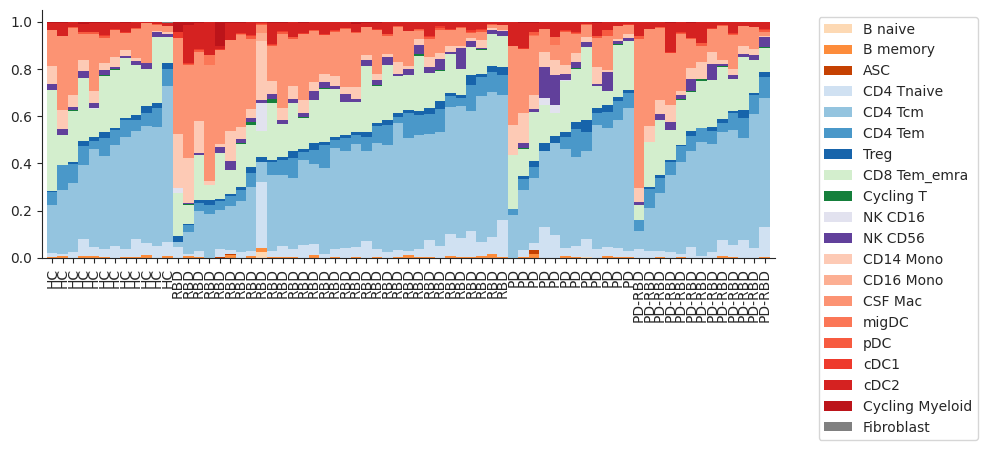

In [74]:
# set category order for data_all.obs['group']
data_all.obs['group'] = pd.Categorical(data_all.obs['group'], categories=['HC', 'RBD', 'PD', 'PD-RBD'])

# Define color palette
colors = ['#fdd9b4', '#fd8c3b', '#c54102', '#d0e1f2', '#94c4df', '#4a98c9',
          '#1764ab', '#d3eecd', '#157f3b', '#e2e2ef', '#61409b', '#fdcab5',
          '#fcaf93', '#fc9373', '#fb7757', '#f75b40', '#ee3a2c', '#d52221',
          '#bc141a', '#808080']

df_plot = df_freq.copy()
df_plot['group'] = data_all.obs['group']
df_plot['CD4T'] = df_plot[['CD4 Tnaive', 'CD4 Tcm', 'CD4 Tem', 'Treg']].sum(axis=1)
df_plot = df_plot.sort_values(by=['group', 'CD4T']).reset_index(drop=True)
# df_plot = df_plot.drop(['group'], axis=1)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10,4))
bottom = np.zeros(len(df_plot))

# Plot each category with the custom color and width adjustments
bar_width = 1  # Adjust bar width as desired
for i, (col, color) in enumerate(zip(df_plot.drop(['group', 'CD4T'], axis=1).columns, colors)):
    ax.bar(df_plot.index, df_plot[col], bottom=bottom, label=col, color=color, width=bar_width, linewidth=0)
    bottom += df_plot[col].values

# Position the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=90)
plt.xticks(range(len(df_plot.index)), df_plot['group'], rotation=90)
plt.tight_layout()
plt.xlim(-1, len(df_plot.index))
sns.despine()
# plt.savefig('../scanpy/250407_CSF_downstream/graph/Cell_freq_per_donor.pdf', bbox_inches='tight')

In [75]:
df_freq

,B naive,B memory,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tem_emra,Cycling T,NK CD16,NK CD56,CD14 Mono,CD16 Mono,CSF Mac,migDC,pDC,cDC1,cDC2,Cycling Myeloid,Fibroblast
0,0.000000,0.005263,0.000000,0.071930,0.316667,0.080702,0.021930,0.265789,0.000000,0.000000,0.028070,0.046491,0.000000,0.111404,0.000877,0.007895,0.000877,0.031579,0.007895,0.002632
1,0.000000,0.001605,0.000000,0.033307,0.477528,0.071027,0.010433,0.251204,0.001204,0.000000,0.009631,0.025682,0.000000,0.070626,0.000000,0.001605,0.000803,0.041332,0.004013,0.000000
2,0.000434,0.014089,0.000217,0.071421,0.615151,0.083993,0.028503,0.132979,0.000108,0.000542,0.017774,0.006178,0.000000,0.015498,0.000217,0.001084,0.000759,0.010404,0.000650,0.000000
3,0.000000,0.000711,0.000000,0.050498,0.482219,0.097440,0.034139,0.128023,0.002134,0.000000,0.048364,0.023471,0.000000,0.097440,0.000000,0.010669,0.005690,0.016358,0.002845,0.000000
4,0.000000,0.001601,0.000000,0.049952,0.297150,0.066603,0.013128,0.136247,0.000640,0.000000,0.018572,0.050272,0.000000,0.314761,0.000640,0.005604,0.003202,0.037784,0.003842,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.000000,0.000000,0.000000,0.017471,0.363145,0.097754,0.013727,0.223378,0.002496,0.000000,0.027454,0.031614,0.000000,0.165973,0.000416,0.000416,0.002496,0.051165,0.002496,0.000000
65,0.000000,0.004178,0.000000,0.033721,0.425843,0.036705,0.009251,0.204118,0.000895,0.000000,0.014324,0.042375,0.000000,0.186213,0.000298,0.003879,0.001791,0.034318,0.001791,0.000298
66,0.000000,0.000000,0.000000,0.000000,0.183673,0.040816,0.020408,0.061224,0.000000,0.000000,0.000000,0.020408,0.000000,0.489796,0.040816,0.000000,0.000000,0.142857,0.000000,0.000000
67,0.000361,0.006859,0.000000,0.009206,0.093682,0.029964,0.004693,0.080505,0.000181,0.000000,0.004693,0.191516,0.000181,0.395307,0.000361,0.003610,0.001805,0.164079,0.012996,0.000000


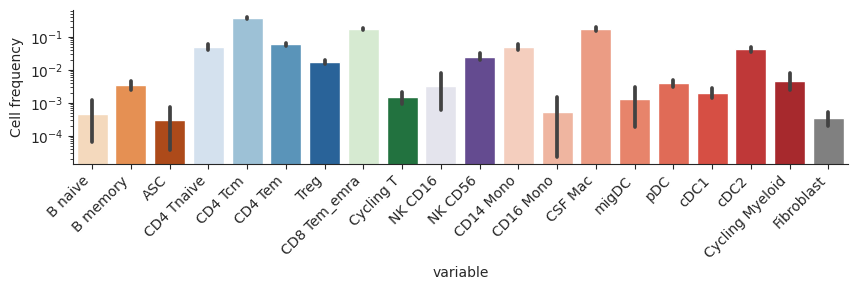

In [76]:
plt.figure(figsize=(10,2))
sns.barplot(df_freq.melt(), y='value', x='variable',  dodge=True, palette=colors)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.yscale('log')
plt.ylabel('Cell frequency')
plt.savefig('../scanpy/250407_CSF_downstream/graph/Cell_freq.pdf', bbox_inches='tight')

## without Age

In [77]:
model = mod.CompositionalAnalysis(data_all, formula="group", reference_cell_type="automatic")
# Run MCMC
sim_results = model.sample_hmc()

Automatic reference selection! Reference cell type set to CD4 Tem
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:43<00:00, 194.02it/s]


MCMC sampling finished. (131.744 sec)
Acceptance rate: 51.0%


In [78]:
sim_results.summary()

Compositional Analysis summary:

Data: 69 samples, 20 cell types
Reference index: 5
Formula: group

Intercepts:
                 Final Parameter  Expected Sample
Cell Type                                        
B naive                   -1.394        17.669541
B memory                  -0.767        33.077137
ASC                       -1.441        16.858287
CD4 Tnaive                 0.903       175.711304
CD4 Tcm                    3.013      1449.309232
CD4 Tem                    1.190       234.121996
Treg                       0.210        87.868584
CD8 Tem_emra               2.261       683.237364
Cycling T                 -1.013        25.863749
NK CD16                   -1.334        18.762165
NK CD56                    0.359       101.986692
CD14 Mono                  0.719       146.180525
CD16 Mono                 -1.463        16.491454
CSF Mac                    1.892       472.407675
migDC                     -1.333        18.780936
pDC                       -0.636      

In [79]:
sim_results.effect_df.to_csv("../scanpy/250407_CSF_downstream/scCODA_woAge_effect.FDR0.05.csv")

In [80]:
pd.DataFrame(sim_results.credible_effects()).to_csv("../scanpy/250407_CSF_downstream/scCODA_woAge_credible.FDR0.05.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.01)).to_csv("../scanpy/250407_CSF_downstream/scCODA_woAge_credible.FDR0.01.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.1)).to_csv("../scanpy/250407_CSF_downstream/scCODA_woAge_credible.FDR0.1.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.2)).to_csv("../scanpy/250407_CSF_downstream/scCODA_woAge_credible.FDR0.2.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.3)).to_csv("../scanpy/250407_CSF_downstream/scCODA_woAge_credible.FDR0.3.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.4)).to_csv("../scanpy/250407_CSF_downstream/scCODA_woAge_credible.FDR0.4.csv")

In [81]:
pd.DataFrame(sim_results.credible_effects(est_fdr=0.2))

Final Parameter
Covariate       Cell Type                       
group[T.RBD]    B naive                    False
                B memory                   False
                ASC                        False
                CD4 Tnaive                 False
                CD4 Tcm                     True
                CD4 Tem                    False
                Treg                       False
                CD8 Tem_emra                True
                Cycling T                  False
                NK CD16                    False
                NK CD56                    False
                CD14 Mono                  False
                CD16 Mono                  False
                CSF Mac                    False
                migDC                      False
                pDC                        False
                cDC1                       False
                cDC2                       False
                Cycling Myeloid            False
                Fibroblast                 False
group[T.PD]     B naive                     True
                B memory                   False
                ASC                        False
                CD4 Tnaive                 False
                CD4 Tcm                    False
                CD4 Tem                    False
                Treg                       False
                CD8 Tem_emra               False
                Cycling T                  False
                NK CD16                    False
                NK CD56                    False
                CD14 Mono                  False
                CD16 Mono                  False
                CSF Mac                    False
                migDC                      False
                pDC                        False
                cDC1                       False
                cDC2                       False
                Cycling Myeloid             True
                Fibroblast                 False
group[T.PD-RBD] B naive                    False
                B memory                   False
                ASC                        False
                CD4 Tnaive                 False
                CD4 Tcm                    False
                CD4 Tem                    False
                Treg                       False
                CD8 Tem_emra               False
                Cycling T                  False
                NK CD16                    False
                NK CD56                    False
                CD14 Mono                  False
                CD16 Mono                  False
                CSF Mac                    False
                migDC                      False
                pDC                        False
                cDC1                       False
                cDC2                       False
                Cycling Myeloid            False
                Fibroblast                 False

## Split RBD by PD prob

In [10]:
df_bld = pd.read_csv('/home/yy693/pi_hafler/ASAP/scanpy/241027_CSF_integrate/cellnumber.csv')
data_all = dat.from_pandas(df_bld, covariate_columns=["DonorID"])

In [11]:
df_meta = pd.read_csv('../scanpy/250407_BLD_downstream/metadata.csv', index_col=0)
# df_meta = df_meta.loc[df_bld.sampleid]
# df_meta = df_meta.reset_index()
# df_meta.head()

In [12]:
df_meta

,Age,Gender,EnrollmentCategory,PD_Probability,Biomarkers_Positive
DonorID,,,,,
YPD001,79.0,Male,HC,HC,HC
YPD002,59.0,Male,HC,HC,HC
YPD003,58.0,Male,RBD,RBD-LowIntm,RBD-0.0
YPD006,70.0,Male,RBD,RBD-High,RBD-2.0
YPD007,66.0,Female,HC,HC,HC
...,...,...,...,...,...
YPD092,66.0,Male,RBD,RBD-High,RBD-2.0
YPD093,71.0,Male,RBD,RBD-High,RBD-2.0
YPD095,76.0,Male,PD,PD,PD


In [13]:
df_meta.loc[df_bld.DonorID].reset_index()

,DonorID,Age,Gender,EnrollmentCategory,PD_Probability,Biomarkers_Positive
0,YPD001,79.0,Male,HC,HC,HC
1,YPD002,59.0,Male,HC,HC,HC
2,YPD003,58.0,Male,RBD,RBD-LowIntm,RBD-0.0
3,YPD004,68.0,Male,RBD,RBD-High,RBD-2.0
4,YPD005,59.0,Male,RBD,RBD-LowIntm,RBD-0.0
...,...,...,...,...,...,...
64,YPD092,66.0,Male,RBD,RBD-High,RBD-2.0
65,YPD093,71.0,Male,RBD,RBD-High,RBD-2.0
66,YPD094,74.0,Male,RBD,RBD-High,RBD-0.0
67,YPD096,69.0,Male,RBD,RBD-High,RBD-2.0


In [14]:
df_meta = df_meta.loc[df_bld.DonorID].reset_index()
df_meta['group'] = df_meta['PD_Probability']
df_meta.head()

,DonorID,Age,Gender,EnrollmentCategory,PD_Probability,Biomarkers_Positive,group
0,YPD001,79.0,Male,HC,HC,HC,HC
1,YPD002,59.0,Male,HC,HC,HC,HC
2,YPD003,58.0,Male,RBD,RBD-LowIntm,RBD-0.0,RBD-LowIntm
3,YPD004,68.0,Male,RBD,RBD-High,RBD-2.0,RBD-High
4,YPD005,59.0,Male,RBD,RBD-LowIntm,RBD-0.0,RBD-LowIntm


In [15]:
data_all.obs = pd.merge(data_all.obs, df_meta, on='DonorID', how='left')

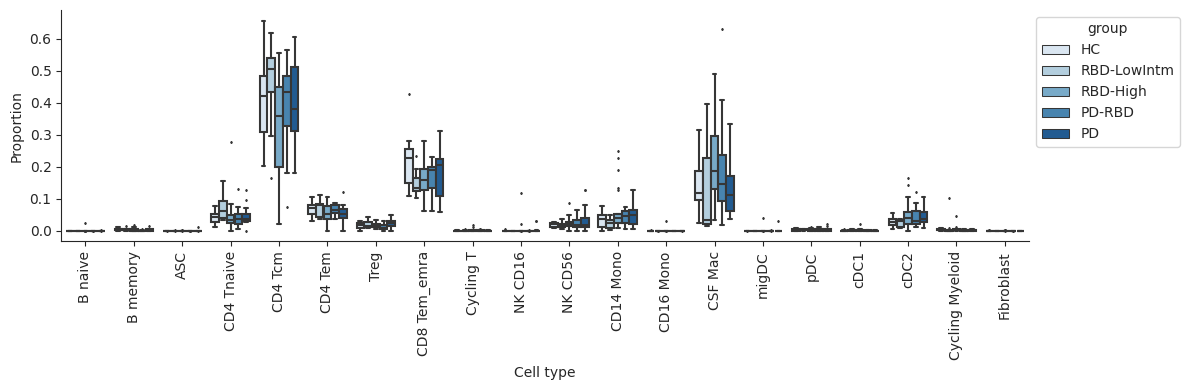

In [88]:
viz.boxplots(data_all, feature_name="group", figsize=(12,4))
sns.despine()
plt.savefig('../scanpy/250407_CSF_downstream/graph/scCODA_split_hyposmia_box.pdf', bbox_inches='tight')

In [89]:
data_all.obs.isna().sum()

DonorID                0
Age                    0
Gender                 0
EnrollmentCategory     0
PD_Probability         0
Biomarkers_Positive    0
group                  0
dtype: int64

In [90]:
model = mod.CompositionalAnalysis(data_all, formula="group", reference_cell_type="automatic")
# Run MCMC
sim_results = model.sample_hmc()

Automatic reference selection! Reference cell type set to CD4 Tem
Zero counts encountered in data! Added a pseudocount of 0.5.


 10%|█         | 2047/20000 [00:11<01:34, 189.12it/s]

100%|██████████| 20000/20000 [01:47<00:00, 185.81it/s]


MCMC sampling finished. (136.961 sec)
Acceptance rate: 52.0%


In [91]:
sim_results.summary()

Compositional Analysis summary:

Data: 69 samples, 20 cell types
Reference index: 5
Formula: group

Intercepts:
                 Final Parameter  Expected Sample
Cell Type                                        
B naive                   -1.371        16.780034
B memory                  -0.721        32.142840
ASC                       -1.434        15.755503
CD4 Tnaive                 0.958       172.291829
CD4 Tcm                    3.100      1467.315353
CD4 Tem                    1.261       233.268400
Treg                       0.253        85.130870
CD8 Tem_emra               2.342       687.587930
Cycling T                 -0.982        24.759016
NK CD16                   -1.320        17.658014
NK CD56                    0.415       100.102005
CD14 Mono                  0.775       143.479149
CD16 Mono                 -1.431        15.802841
CSF Mac                    1.975       476.367550
migDC                     -1.310        17.835480
pDC                       -0.597      

In [92]:
sim_results.effect_df.to_csv("../scanpy/250407_CSF_downstream/scCODA_split_RBD_woAge_effect.FDR0.05.csv")

In [93]:
pd.DataFrame(sim_results.credible_effects(est_fdr=0.01)).to_csv("../scanpy/250407_CSF_downstream/scCODA_split_RBD_woAge_credible.FDR0.01.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.05)).to_csv("../scanpy/250407_CSF_downstream/scCODA_split_RBD_woAge_credible.FDR0.05.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.1)).to_csv("../scanpy/250407_CSF_downstream/scCODA_split_RBD_woAge_credible.FDR0.1.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.2)).to_csv("../scanpy/250407_CSF_downstream/scCODA_split_RBD_woAge_credible.FDR0.2.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.3)).to_csv("../scanpy/250407_CSF_downstream/scCODA_split_RBD_woAge_credible.FDR0.3.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.4)).to_csv("../scanpy/250407_CSF_downstream/scCODA_split_RBD_woAge_credible.FDR0.4.csv")


In [16]:
df_freq =  (data_all.to_df().T / data_all.to_df().sum(axis=1).T).T

list_dis = ['RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD']

list_fc = []
for dis in list_dis:
    list_fc.append(list((df_freq.loc[data_all.obs[data_all.obs['group'] == dis].index].mean() / \
    df_freq.loc[data_all.obs[data_all.obs['group'] == 'HC'].index].mean())))

df_fc = pd.DataFrame(list_fc, columns=df_freq.columns, index=list_dis)
df_fc.to_csv("../scanpy/250407_CSF_downstream/scCODA_split_RBD_FC.csv")
df_fc

,B naive,B memory,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tem_emra,Cycling T,NK CD16,NK CD56,CD14 Mono,CD16 Mono,CSF Mac,migDC,pDC,cDC1,cDC2,Cycling Myeloid,Fibroblast
RBD-LowIntm,1.140965,1.057195,24.694628,1.696138,1.137713,1.028923,1.196998,0.676285,1.701817,0.212509,1.007040,0.689195,0.750267,0.870963,1.787757,1.222692,2.075329,0.889092,3.778539,0.506283
RBD-High,10.263805,0.911231,8.826886,1.073656,0.800131,0.793730,1.029649,0.744118,2.561686,8.271409,1.236088,1.917360,7.018498,1.523219,11.769431,1.215466,2.463915,1.764848,1.433493,0.437039
PD,1.953357,0.930062,73.344958,1.135199,0.969423,0.781882,1.371631,0.810023,1.099139,7.457434,2.070331,1.552980,0.098688,0.949431,16.235077,1.662407,0.752935,1.585434,0.501699,0.244124
PD-RBD,0.730067,0.306722,2.370226,1.019195,0.951102,0.966403,0.740197,0.762379,2.105674,0.283271,1.223806,1.220658,0.000000,1.374055,1.857946,1.430104,0.894373,1.548678,0.540863,0.178264


In [17]:
df_freq

,B naive,B memory,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tem_emra,Cycling T,NK CD16,NK CD56,CD14 Mono,CD16 Mono,CSF Mac,migDC,pDC,cDC1,cDC2,Cycling Myeloid,Fibroblast
0,0.000000,0.005263,0.000000,0.071930,0.316667,0.080702,0.021930,0.265789,0.000000,0.000000,0.028070,0.046491,0.000000,0.111404,0.000877,0.007895,0.000877,0.031579,0.007895,0.002632
1,0.000000,0.001605,0.000000,0.033307,0.477528,0.071027,0.010433,0.251204,0.001204,0.000000,0.009631,0.025682,0.000000,0.070626,0.000000,0.001605,0.000803,0.041332,0.004013,0.000000
2,0.000434,0.014089,0.000217,0.071421,0.615151,0.083993,0.028503,0.132979,0.000108,0.000542,0.017774,0.006178,0.000000,0.015498,0.000217,0.001084,0.000759,0.010404,0.000650,0.000000
3,0.000000,0.000711,0.000000,0.050498,0.482219,0.097440,0.034139,0.128023,0.002134,0.000000,0.048364,0.023471,0.000000,0.097440,0.000000,0.010669,0.005690,0.016358,0.002845,0.000000
4,0.000000,0.001601,0.000000,0.049952,0.297150,0.066603,0.013128,0.136247,0.000640,0.000000,0.018572,0.050272,0.000000,0.314761,0.000640,0.005604,0.003202,0.037784,0.003842,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.000000,0.000000,0.000000,0.017471,0.363145,0.097754,0.013727,0.223378,0.002496,0.000000,0.027454,0.031614,0.000000,0.165973,0.000416,0.000416,0.002496,0.051165,0.002496,0.000000
65,0.000000,0.004178,0.000000,0.033721,0.425843,0.036705,0.009251,0.204118,0.000895,0.000000,0.014324,0.042375,0.000000,0.186213,0.000298,0.003879,0.001791,0.034318,0.001791,0.000298
66,0.000000,0.000000,0.000000,0.000000,0.183673,0.040816,0.020408,0.061224,0.000000,0.000000,0.000000,0.020408,0.000000,0.489796,0.040816,0.000000,0.000000,0.142857,0.000000,0.000000
67,0.000361,0.006859,0.000000,0.009206,0.093682,0.029964,0.004693,0.080505,0.000181,0.000000,0.004693,0.191516,0.000181,0.395307,0.000361,0.003610,0.001805,0.164079,0.012996,0.000000


In [18]:
df_freq['group'] = data_all.obs['group']

In [19]:
df_freq

,B naive,B memory,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tem_emra,Cycling T,NK CD16,...,CD14 Mono,CD16 Mono,CSF Mac,migDC,pDC,cDC1,cDC2,Cycling Myeloid,Fibroblast,group
0,0.000000,0.005263,0.000000,0.071930,0.316667,0.080702,0.021930,0.265789,0.000000,0.000000,...,0.046491,0.000000,0.111404,0.000877,0.007895,0.000877,0.031579,0.007895,0.002632,HC
1,0.000000,0.001605,0.000000,0.033307,0.477528,0.071027,0.010433,0.251204,0.001204,0.000000,...,0.025682,0.000000,0.070626,0.000000,0.001605,0.000803,0.041332,0.004013,0.000000,HC
2,0.000434,0.014089,0.000217,0.071421,0.615151,0.083993,0.028503,0.132979,0.000108,0.000542,...,0.006178,0.000000,0.015498,0.000217,0.001084,0.000759,0.010404,0.000650,0.000000,RBD-LowIntm
3,0.000000,0.000711,0.000000,0.050498,0.482219,0.097440,0.034139,0.128023,0.002134,0.000000,...,0.023471,0.000000,0.097440,0.000000,0.010669,0.005690,0.016358,0.002845,0.000000,RBD-High
4,0.000000,0.001601,0.000000,0.049952,0.297150,0.066603,0.013128,0.136247,0.000640,0.000000,...,0.050272,0.000000,0.314761,0.000640,0.005604,0.003202,0.037784,0.003842,0.000000,RBD-LowIntm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.000000,0.000000,0.000000,0.017471,0.363145,0.097754,0.013727,0.223378,0.002496,0.000000,...,0.031614,0.000000,0.165973,0.000416,0.000416,0.002496,0.051165,0.002496,0.000000,RBD-High
65,0.000000,0.004178,0.000000,0.033721,0.425843,0.036705,0.009251,0.204118,0.000895,0.000000,...,0.042375,0.000000,0.186213,0.000298,0.003879,0.001791,0.034318,0.001791,0.000298,RBD-High
66,0.000000,0.000000,0.000000,0.000000,0.183673,0.040816,0.020408,0.061224,0.000000,0.000000,...,0.020408,0.000000,0.489796,0.040816,0.000000,0.000000,0.142857,0.000000,0.000000,RBD-High
67,0.000361,0.006859,0.000000,0.009206,0.093682,0.029964,0.004693,0.080505,0.000181,0.000000,...,0.191516,0.000181,0.395307,0.000361,0.003610,0.001805,0.164079,0.012996,0.000000,RBD-High


In [17]:
df_plot = pd.concat([df_freq, data_all.obs], axis=1)
df_plot_rbd = df_plot[df_plot['EnrollmentCategory'] == 'RBD']

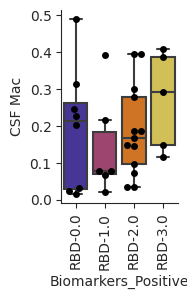

In [18]:
celltype = 'CSF Mac'
plt.figure(figsize=(1.5,2.5))
sns.swarmplot(data=df_plot_rbd, x='Biomarkers_Positive', y=celltype, color='black', size=5, order=['RBD-0.0', 'RBD-1.0','RBD-2.0', 'RBD-3.0'])
sns.boxplot(data=df_plot_rbd, x='Biomarkers_Positive', y=celltype, 
    boxprops=dict(alpha=1), showfliers=False, 
    order=['RBD-0.0', 'RBD-1.0','RBD-2.0', 'RBD-3.0'],
    palette='CMRmap')
plt.xticks(rotation=90)
sns.despine()
plt.savefig(f'../scanpy/250407_CSF_downstream/graph/freq_per_group_RBD_biomarker_{celltype}.pdf', bbox_inches='tight')

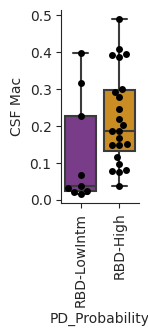

In [19]:
celltype = 'CSF Mac'
plt.figure(figsize=(1,2.5))
sns.swarmplot(data=df_plot_rbd, x='PD_Probability', y=celltype, color='black', size=5, order=['RBD-LowIntm', 'RBD-High'])
sns.boxplot(data=df_plot_rbd, x='PD_Probability', y=celltype, 
    boxprops=dict(alpha=1), showfliers=False, 
    order=['RBD-LowIntm', 'RBD-High'],
    palette='CMRmap')
plt.xticks(rotation=90)
sns.despine()
plt.savefig(f'../scanpy/250407_CSF_downstream/graph/freq_per_group_RBD_PDprob_{celltype}.pdf', bbox_inches='tight')

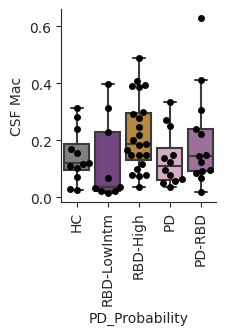

In [20]:
celltype = 'CSF Mac'
plt.figure(figsize=(2,2.5))
sns.swarmplot(data=df_plot, x='PD_Probability', y=celltype, color='black', size=5, order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'])
sns.boxplot(data=df_plot, x='PD_Probability', y=celltype, boxprops=dict(alpha=1), showfliers=False, order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'],
palette=["gray", "#793C89", "#C98E2B", "#DEA4CA", "#A567A1", "#595996"])
plt.xticks(rotation=90)
sns.despine()
plt.savefig(f'../scanpy/250407_CSF_downstream/graph/freq_per_group_{celltype}.pdf', bbox_inches='tight')